# Pandas Basics <hr style="border:2.5px solid #263849"></hr>

Data Analyst: Esthaniel Louis E. Londres <br>
Department: Electrical Engineering

# DataFrame

In [9]:
#%pip install pandas --upgrade

In [10]:
#%pip install matplotlib --upgrade

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
import pandas as pd

In [6]:
data = {
    "name":['Venti','Raiden','Furina'],
    "age":[25, 22, 21],
    "sex":['M', 'F', 'F']
}
data

{'name': ['Venti', 'Raiden', 'Furina'],
 'age': [25, 22, 21],
 'sex': ['M', 'F', 'F']}

In [11]:
df = pd.DataFrame(data)
df

,name,age,sex
0,Venti,25,M
1,Raiden,22,F
2,Furina,21,F


In [12]:
df['age']

0    25
1    22
2    21
Name: age, dtype: int64

In [13]:
df['age'].sum()

np.int64(68)

In [14]:
df['age'].mean()

np.float64(22.666666666666668)

In [15]:
df['age'].median()

np.float64(22.0)

In [16]:
df['name']

0     Venti
1    Raiden
2    Furina
Name: name, dtype: object

In [17]:
df['sex']

0    M
1    F
2    F
Name: sex, dtype: object

# Corrolation

In [18]:
data = {
    "Current":[2, 3.5, 1.8, 4.2, 2.7],
    "Power":[100, 200, 90, 210, 110]
}
data

{'Current': [2, 3.5, 1.8, 4.2, 2.7], 'Power': [100, 200, 90, 210, 110]}

In [19]:
df = pd.DataFrame(data)
df

,Current,Power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [20]:
df.cov()

,Current,Power
Current,1.023,56.15
Power,56.150,3370.00


In [21]:
df.describe()

,Current,Power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


# Scatter Plot

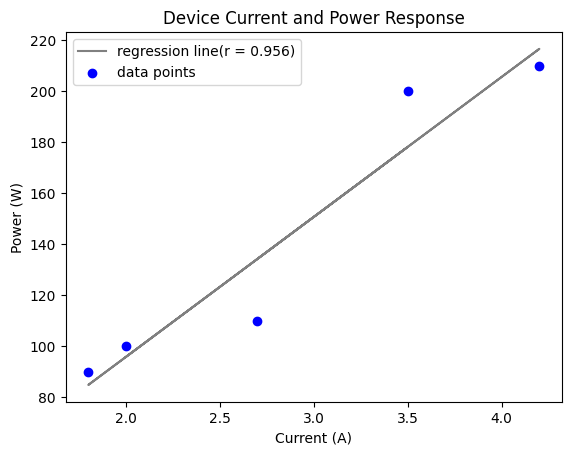

In [22]:
x = df['Current']
y = df['Power']

# regression line
slope, intercept, r, p_value, std_err = stats.linregress(x,y)
line = slope*x + intercept

plt.plot(x,line,
         color='grey',
         label=f'regression line(r = {r:.3f})')

# scatter
plt.scatter(x,y,
            color='blue',
            label='data points')
plt.title('Device Current and Power Response')
plt.ylabel('Power (W)')
plt.xlabel('Current (A)')
plt.legend()
plt.show()

# Resistance Test

In [23]:
resistance = pd.read_csv("resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [24]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


In [29]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

np.float64(9.399999999999999)

In [26]:
pan_mean = resistance['Panther'].mean()
pan_mean

np.float64(10.75)

In [27]:
resistance['Panther'].fillna(pan_mean)

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [28]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


# Bar Graph

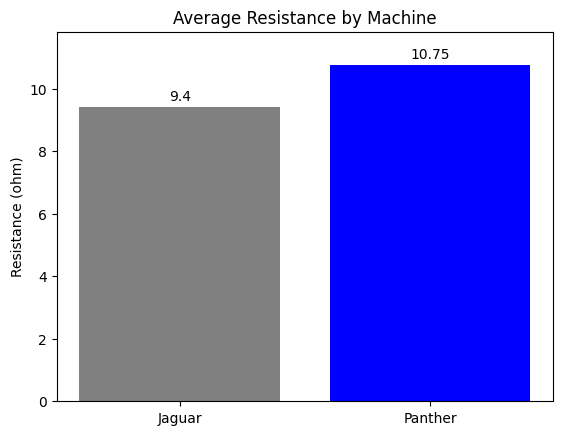

In [32]:
bars = plt.bar(['Jaguar','Panther'],[jag_mean,pan_mean],
               color=['grey','blue'])
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohm)')

# bar labels
plt.bar_label(bars, padding=3)
plt.margins(y=0.1) # 10
plt.show()
